In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
try:
    # Attempt to read with UTF-8 (default)
    df = pd.read_csv('Attrition_data Fix location.csv.xls')
except UnicodeDecodeError:
    # If UTF-8 fails, try reading with 'latin1' encoding
    df = pd.read_csv('Attrition_data Fix location.csv.xls', encoding='latin1')

# Display the first few rows of the DataFrame
df.head()

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,...,Remarks,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks
0,1,XYZ2685,ABC1,22-Nov-10,Sales Executive,E1,Yes,Bhavnagar,26-May-12,1. 6,...,Issues with the Manager,bhavnagar,NO,bhavnagar,NO,City in Gujarat,bhavnagar,gujarat,west,NaN
1,2,XYZ2490,ABC2,05-Jul-10,Technical Services Officer,M2,Yes,Jayanagar,06-Apr-12,1. 9,...,More Challenging Job Roles/ Higher designation,jayanagar,YES,jayanagar,NO,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th..."
2,3,XYZ2662,ABC3,20-Oct-10,Sales Executive,E1,Yes,Indore,07-Apr-12,1. 5,...,Issues with the Manager,indore,NO,indore,NO,NaN,indore,madhya pradesh,central,NaN
3,4,XYZ1679,ABC4,01-May-08,AM - Sales,M1,Yes,Admin Gujarat,03-Apr-12,3 .11,...,Lack of Growth,admin gujarat,NO,admin gujarat,NO,NaN,NaN,gujarat,west,NaN
4,5,XYZ2378,ABC5,03-Mar-10,Sales Executive,E1,Yes,Jagdishpuram,10-Apr-12,2 .1,...,Issues with the Manager,jagdishpuram,YES,jagdishpuram,NO,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th..."


In [4]:
df.columns

Index(['S.No', 'EmpID', 'Emp Name', 'DOJ', 'Designation', 'Grade',
       'Attrition ', 'Location', 'In Active Date', 'Tenure', 'Gender',
       'Education', 'Age', 'Last Rating', 'Monthly Income',
       'Engagement Score (% Satisfaction)', 'Marital Status', 'Zone',
       'Remarks', 'lower location', 'DoubtFul', 'Fixed Location', 'Changed',
       'location_remarks', 'City/District', 'State', 'zone_lower',
       'state_remarks'],
      dtype='object')

In [5]:
df.drop(["DOJ", "In Active Date"], axis=1, inplace=True)

In [6]:
df.drop("Attrition ", axis=1, inplace=True)

In [7]:
df.head()

,S.No,EmpID,Emp Name,Designation,Grade,Location,Tenure,Gender,Education,Age,...,Remarks,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks
0,1,XYZ2685,ABC1,Sales Executive,E1,Bhavnagar,1. 6,Female,Bachelors,27,...,Issues with the Manager,bhavnagar,NO,bhavnagar,NO,City in Gujarat,bhavnagar,gujarat,west,NaN
1,2,XYZ2490,ABC2,Technical Services Officer,M2,Jayanagar,1. 9,Male,MBA,36,...,More Challenging Job Roles/ Higher designation,jayanagar,YES,jayanagar,NO,"Jayanagar, Bangalore / Jayanagar, Mysore",NaN,karnataka,south,"Whatever be the location, the state remains th..."
2,3,XYZ2662,ABC3,Sales Executive,E1,Indore,1. 5,Male,Bachelors,24,...,Issues with the Manager,indore,NO,indore,NO,NaN,indore,madhya pradesh,central,NaN
3,4,XYZ1679,ABC4,AM - Sales,M1,Admin Gujarat,3 .11,Male,Bachelors,33,...,Lack of Growth,admin gujarat,NO,admin gujarat,NO,NaN,NaN,gujarat,west,NaN
4,5,XYZ2378,ABC5,Sales Executive,E1,Jagdishpuram,2 .1,Male,Bachelors,24,...,Issues with the Manager,jagdishpuram,YES,jagdishpuram,NO,Ghazipur/ Raebareli Distt,NaN,uttar pradesh,north,"Whatever be the location, the state remains th..."


In [8]:
df.isna().sum()

S.No                                   0
EmpID                                  0
Emp Name                               0
Designation                            0
Grade                                  0
Location                               2
Tenure                                 0
Gender                                 0
Education                              0
Age                                    0
Last Rating                            0
Monthly Income                         0
Engagement Score (% Satisfaction)      0
Marital Status                         0
Zone                                   0
Remarks                                0
lower location                         2
DoubtFul                               2
Fixed Location                         2
Changed                                0
location_remarks                     170
City/District                         33
State                                 20
zone_lower                             0
state_remarks   

In [9]:
df["Location"].fillna(df["Location"].mode()[0],inplace=True)
df["lower location"].fillna(df["lower location"].mode()[0],inplace=True)
df["DoubtFul"].fillna(df["DoubtFul"].mode()[0],inplace=True)
df["Fixed Location"].fillna(df["Fixed Location"].mode()[0],inplace=True)
df["location_remarks"].fillna(df["location_remarks"].mode()[0],inplace=True)
df["City/District"].fillna(df["City/District"].mode()[0],inplace=True)
df["State"].fillna(df["State"].mode()[0],inplace=True)
df["state_remarks"].fillna(df["state_remarks"].mode()[0],inplace=True)

/var/folders/04/snd2w4552q96vrj1ypkknxdr0000gn/T/ipykernel_6648/3248752623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Location"].fillna(df["Location"].mode()[0],inplace=True)
/var/folders/04/snd2w4552q96vrj1ypkknxdr0000gn/T/ipykernel_6648/3248752623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [10]:
df.isna().sum()

S.No                                 0
EmpID                                0
Emp Name                             0
Designation                          0
Grade                                0
Location                             0
Tenure                               0
Gender                               0
Education                            0
Age                                  0
Last Rating                          0
Monthly Income                       0
Engagement Score (% Satisfaction)    0
Marital Status                       0
Zone                                 0
Remarks                              0
lower location                       0
DoubtFul                             0
Fixed Location                       0
Changed                              0
location_remarks                     0
City/District                        0
State                                0
zone_lower                           0
state_remarks                        0
dtype: int64

In [11]:
object_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


for col in object_columns:
    df[col] = le.fit_transform(df[col])

In [12]:
df.head()

,S.No,EmpID,Emp Name,Designation,Grade,Location,Tenure,Gender,Education,Age,...,Remarks,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks
0,1,143,0,4,1,25,20,0,0,27,...,4,26,0,23,0,11,10,4,5,2
1,2,109,111,8,4,64,23,1,1,36,...,6,63,1,55,0,28,68,9,4,2
2,3,139,222,4,1,55,19,1,0,24,...,4,54,0,48,0,0,30,11,0,2
3,4,43,261,1,3,1,39,1,0,33,...,5,1,0,1,0,0,68,4,5,2
4,5,96,272,5,1,59,25,1,0,24,...,4,58,1,51,0,22,68,19,3,2


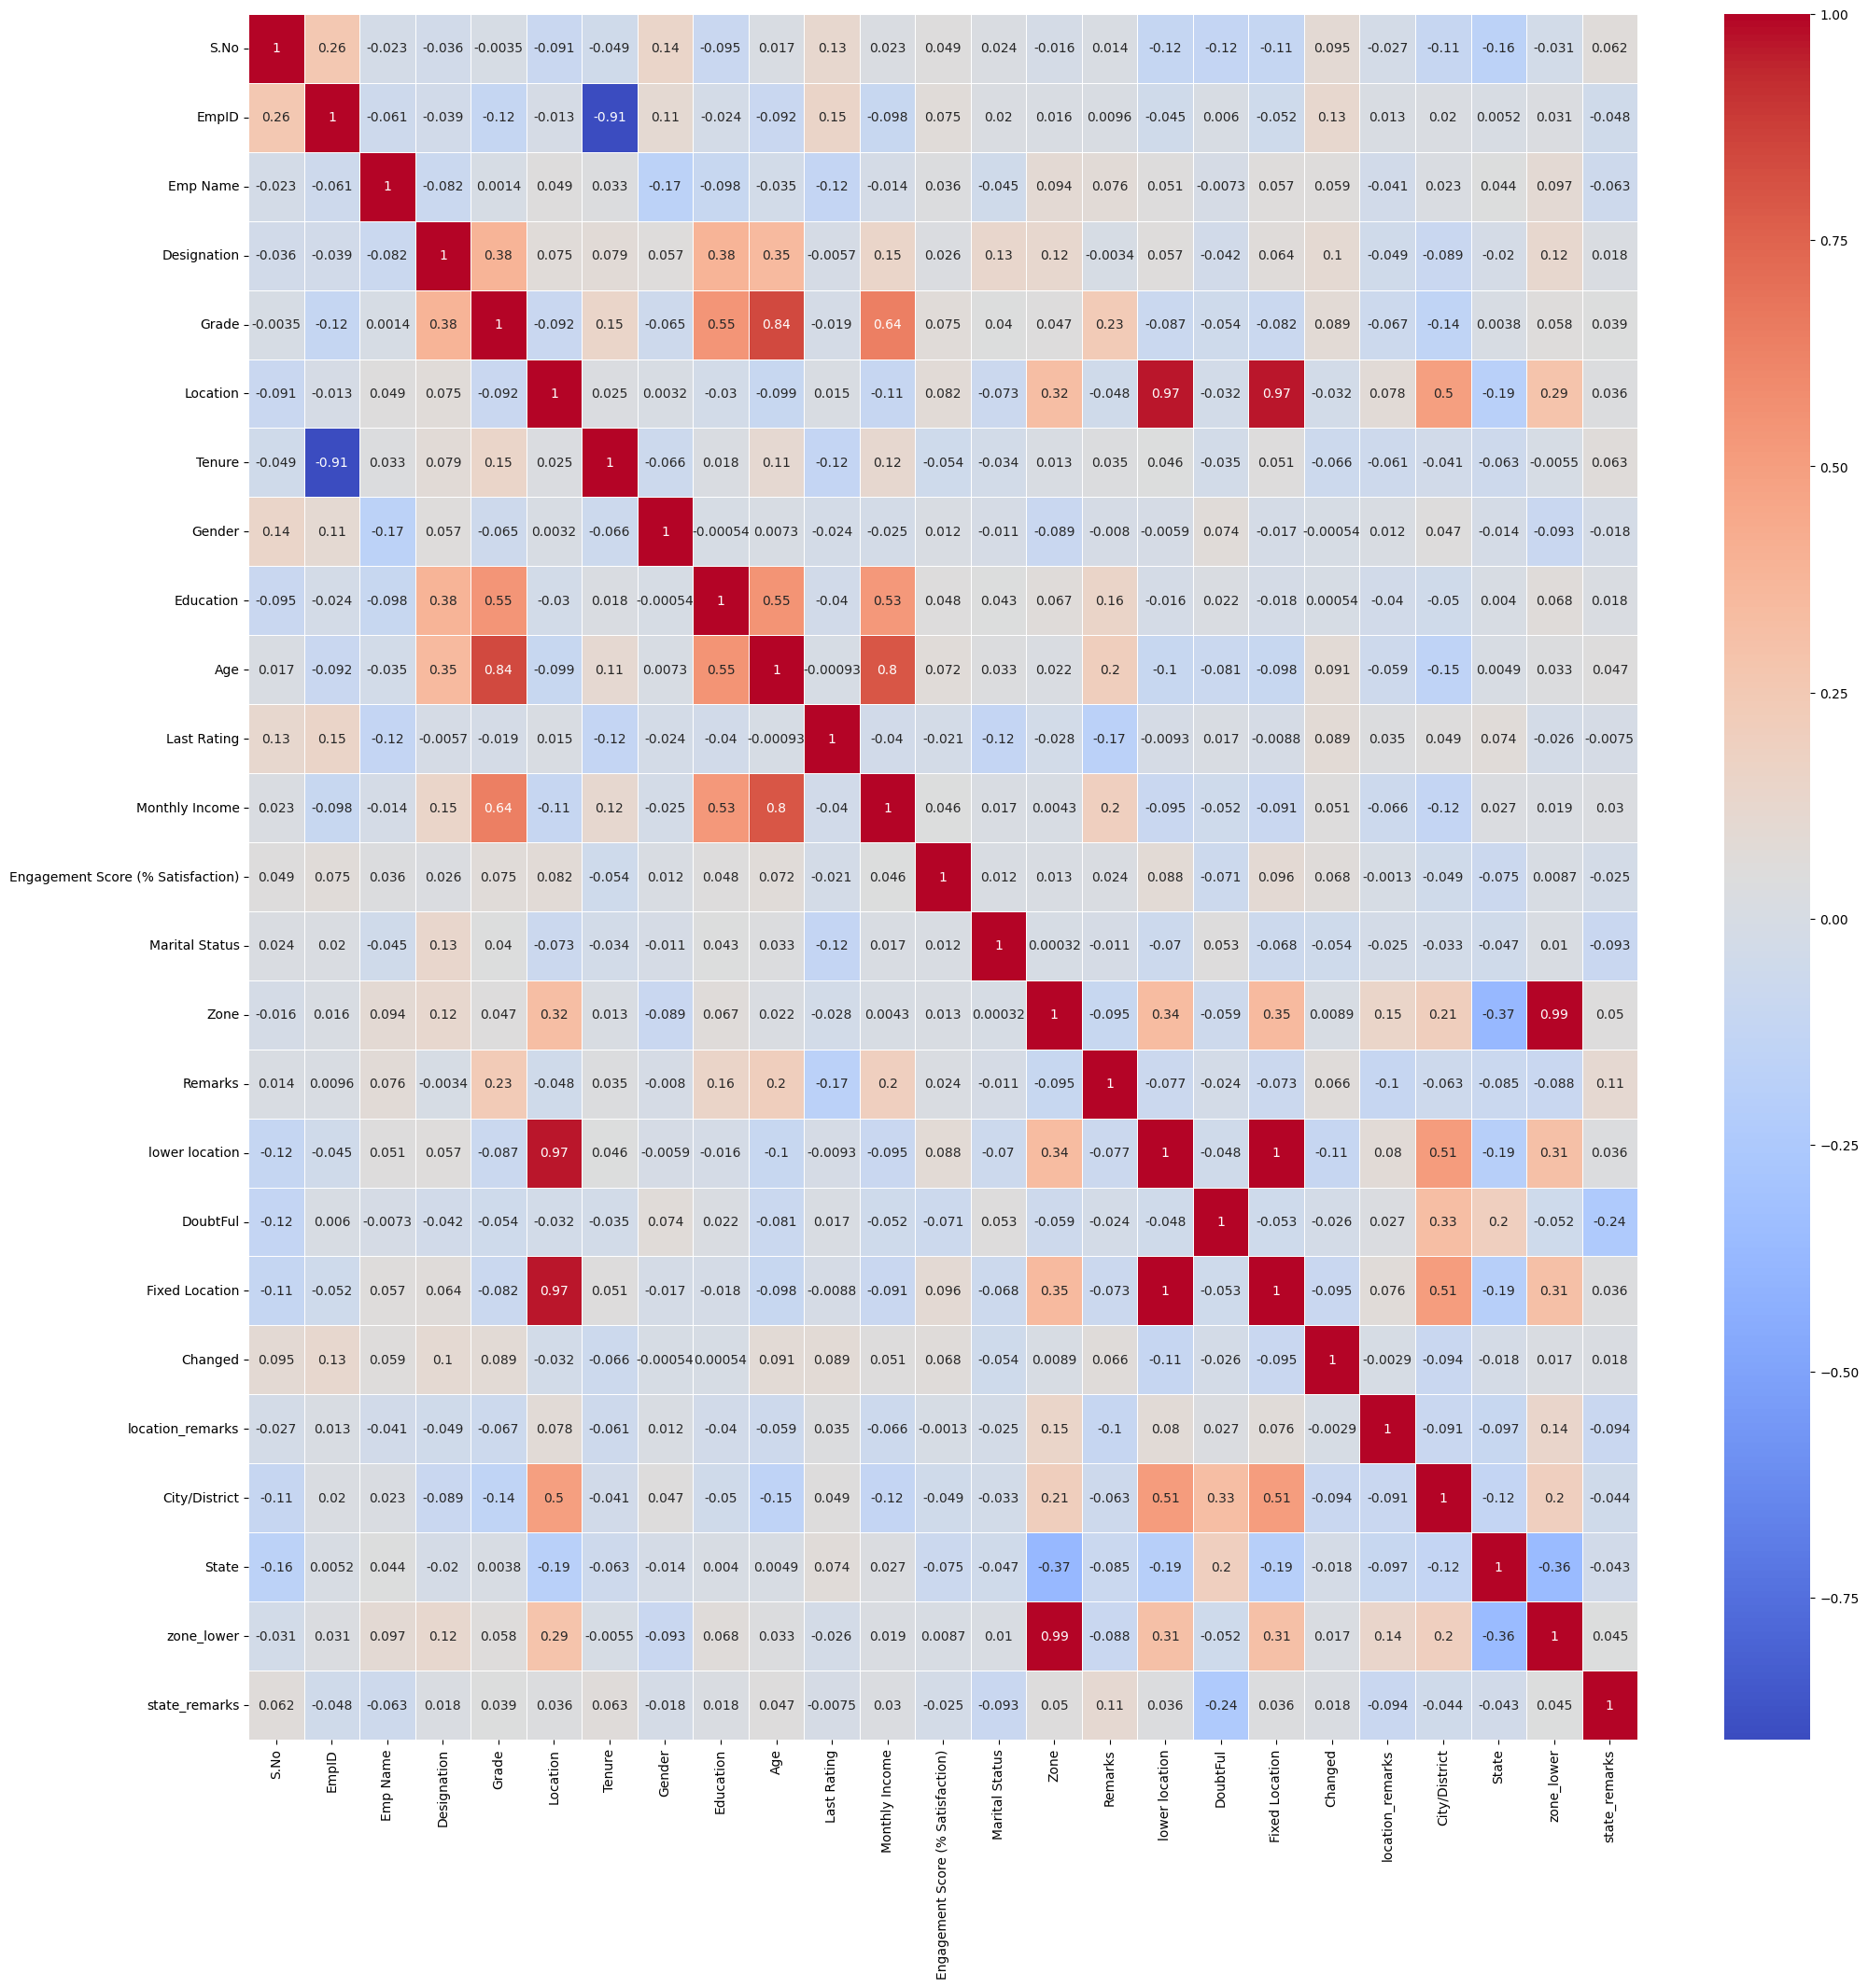

In [13]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.show()

In [14]:
df.drop("Emp Name", axis=1, inplace=True)

In [15]:
df.drop("Age", axis=1, inplace=True)

In [16]:
df.drop("Engagement Score (% Satisfaction)", axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   S.No              327 non-null    int64
 1   EmpID             327 non-null    int64
 2   Designation       327 non-null    int64
 3   Grade             327 non-null    int64
 4   Location          327 non-null    int64
 5   Tenure            327 non-null    int64
 6   Gender            327 non-null    int64
 7   Education         327 non-null    int64
 8   Last Rating       327 non-null    int64
 9   Monthly Income    327 non-null    int64
 10  Marital Status    327 non-null    int64
 11  Zone              327 non-null    int64
 12  Remarks           327 non-null    int64
 13  lower location    327 non-null    int64
 14  DoubtFul          327 non-null    int64
 15  Fixed Location    327 non-null    int64
 16  Changed           327 non-null    int64
 17  location_remarks  327 non-null    i

In [18]:
df.head()

,S.No,EmpID,Designation,Grade,Location,Tenure,Gender,Education,Last Rating,Monthly Income,...,Remarks,lower location,DoubtFul,Fixed Location,Changed,location_remarks,City/District,State,zone_lower,state_remarks
0,1,143,4,1,25,20,0,0,4,25535,...,4,26,0,23,0,11,10,4,5,2
1,2,109,8,4,64,23,1,1,2,52155,...,6,63,1,55,0,28,68,9,4,2
2,3,139,4,1,55,19,1,0,4,26438,...,4,54,0,48,0,0,30,11,0,2
3,4,43,1,3,1,39,1,0,2,54311,...,5,1,0,1,0,0,68,4,5,2
4,5,96,5,1,59,25,1,0,4,26702,...,4,58,1,51,0,22,68,19,3,2


In [19]:
from sklearn.model_selection import train_test_split

X = df[['EmpID','Designation','Grade','Location','Tenure','Gender','Education','Last Rating','Monthly Income','Remarks','lower location','Fixed Location','Changed','location_remarks','City/District','State','zone_lower','state_remarks']]
y = df['DoubtFul']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (261, 18)
X_test shape: (66, 18)
y_train shape: (261,)
y_test shape: (66,)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [21]:
svm_model = SVC(kernel='linear', random_state=42)

# Train SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.75      0.60      0.67        10

    accuracy                           0.91        66
   macro avg       0.84      0.78      0.81        66
weighted avg       0.90      0.91      0.90        66



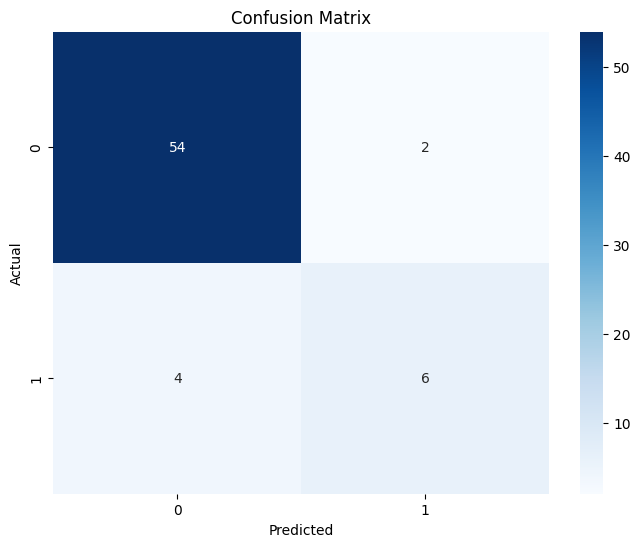

In [22]:
from sklearn.metrics import roc_curve, classification_report
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()